In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
import time

exploration de la base de donnée

In [2]:
# Chargement du fichier
data = pd.read_csv("/content/RT_IOT2022")

# Supprimer la colonne 'Unnamed'
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91569,61114,21,tcp,-,0.000004,1,1,1,0,246723.764706,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64.0,0.0,64.0,DOS_SYN_Hping
91570,61115,21,tcp,-,0.000004,1,1,1,0,262144.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64.0,0.0,64.0,DOS_SYN_Hping
91571,61116,21,tcp,-,0.000005,1,1,1,0,199728.761905,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64.0,0.0,64.0,DOS_SYN_Hping
91572,61117,21,tcp,-,0.000005,1,1,1,0,199728.761905,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64.0,0.0,64.0,DOS_SYN_Hping


In [ ]:
data['Attack_type'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

In [ ]:
data.isna().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

In [ ]:
le=LabelEncoder()
# Effectuer l'encodage des étiquettes dans la colonne 'Attack_type'
data['Attack_type_encoder'] = le.fit_transform(data['Attack_type'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

In [ ]:
# Transformation inverse de toutes les valeurs encodées dans la colonne 'Attack_type'
decoded_values = le.inverse_transform(data['Attack_type_encoder'])

# Affichage des valeurs décodées
print(decoded_values)

['MQTT_Publish' 'MQTT_Publish' 'MQTT_Publish' ... 'NMAP_XMAS_TREE_SCAN'
 'NMAP_XMAS_TREE_SCAN' 'NMAP_XMAS_TREE_SCAN']


In [ ]:
##realisation du one-hot encoding pour les colonnes les features en chaine de caractères

# Ajouter les colonnes 'p1' et 'p2' à la liste des colonnes à encoder en one-hot
one_hot_encode_cols = ['proto', 'service']

# Appliquer le one-hot encoding aux colonnes sélectionnées
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)

# Afficher les premières lignes du DataFrame après encodage
data

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl
0,38667,1883,32.011598,9,5,3,3,0.281148,0.156193,0.437341,...,0,0,0,0,0,1,0,0,0,0
1,51143,1883,31.883584,9,5,3,3,0.282277,0.156821,0.439097,...,0,0,0,0,0,1,0,0,0,0
2,44761,1883,32.124053,9,5,3,3,0.280164,0.155647,0.435811,...,0,0,0,0,0,1,0,0,0,0
3,60893,1883,31.961063,9,5,3,3,0.281593,0.156440,0.438033,...,0,0,0,0,0,1,0,0,0,0
4,51087,1883,31.902362,9,5,3,3,0.282111,0.156728,0.438839,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0,0,0,0,0,0,0,0,0,0
123113,59247,64623,0.000007,1,1,0,0,144631.172414,144631.172414,289262.344828,...,0,0,0,0,0,0,0,0,0,0
123114,59247,64680,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0,0,0,0,0,0,0,0,0,0
123115,59247,65000,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0,0,0,0,0,0,0,0,0,0


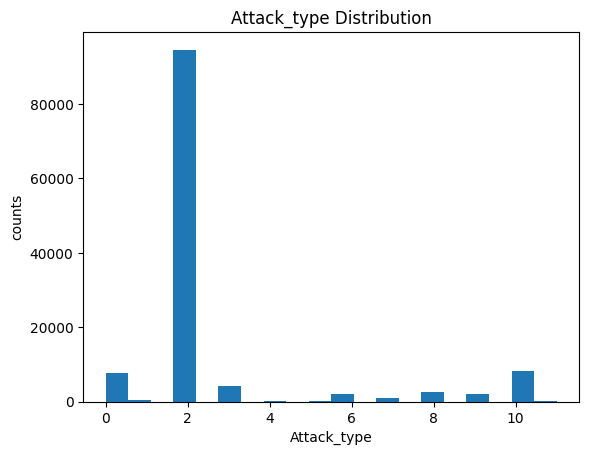

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Attack_type_encode' column
plt.hist(data['Attack_type_encoder'], bins=20)
plt.xlabel('Attack_type')
plt.ylabel('counts')
plt.title('Attack_type Distribution')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 94 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   flow_duration             123117 non-null  float64
 3   fwd_pkts_tot              123117 non-null  int64  
 4   bwd_pkts_tot              123117 non-null  int64  
 5   fwd_data_pkts_tot         123117 non-null  int64  
 6   bwd_data_pkts_tot         123117 non-null  int64  
 7   fwd_pkts_per_sec          123117 non-null  float64
 8   bwd_pkts_per_sec          123117 non-null  float64
 9   flow_pkts_per_sec         123117 non-null  float64
 10  down_up_ratio             123117 non-null  float64
 11  fwd_header_size_tot       123117 non-null  int64  
 12  fwd_header_size_min       123117 non-null  int64  
 13  fwd_header_size_max       123117 non-null  i

In [ ]:
#Préparation des vécteurs
X = data.loc[:, "id.orig_p":"service_ssl"].drop(columns=["Attack_type_encoder","Attack_type"])
Y=data["Attack_type_encoder"]
X.shape


(123117, 92)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Supposons que X_binaire contient vos caractéristiques binaires et X_numerique contient vos caractéristiques numériques
X_binaire=X.loc[:, "proto_tcp":"service_ssl"]


# Exclusion des colonnes binaires et de la colonne "Satisfaction"
colonnes_a_exclure = list(X_binaire.columns)
X_numerique = X.drop(columns=colonnes_a_exclure)

print(X_numerique.shape)
print(X_binaire.shape)

# Appliquer le StandardScaler aux caractéristiques numériques
scaler = StandardScaler()
X_numerique_scaled = scaler.fit_transform(X_numerique)
print(X_numerique_scaled.shape)

# Créer une DataFrame pour les caractéristiques numériques mises à l'échelle
X_numerique_scaled_df = pd.DataFrame(X_numerique_scaled, columns=X_numerique.columns)

# Réinitialiser les index des DataFrames
#X_numerique_scaled_df.reset_index(drop=True, inplace=True)
#X_binaire.reset_index(drop=True, inplace=True)

# Concaténer les caractéristiques numériques mises à l'échelle avec les caractéristiques binaires
X_standardise = pd.concat([X_numerique_scaled_df, X_binaire], axis=1)

print(X_standardise.shape)

(123117, 81)
(123117, 11)
(123117, 81)
(123117, 92)


In [ ]:
# Vérifier s'il y a des valeurs NaN dans X_processed
has_nan = X_standardise.isna().any().any()

if has_nan:
    print("X_standardise contient des valeurs NaN.")
else:
    print("X_standardise ne contient pas de valeurs NaN.")


X_standardise ne contient pas de valeurs NaN.


<Axes: >

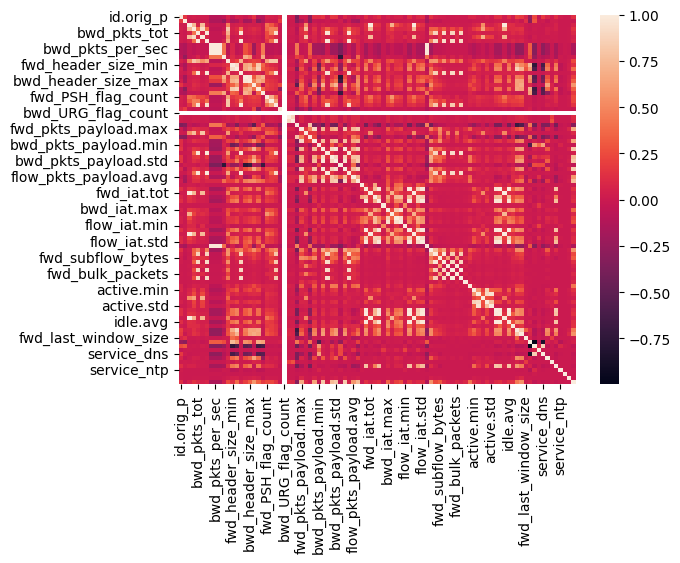

In [ ]:
#La correlation (Donner des interprétation)
import  seaborn as sns
corr=X_standardise.corr()
sns.heatmap(data=corr)

In [ ]:
# Sélectionner les attributs avec une variance supérieure à 0.5
selector = VarianceThreshold(threshold=0.5)
selected_features = selector.fit_transform(X_standardise)

# Récupérer les noms des colonnes sélectionnées
selected_column_indices = selector.get_support(indices=True)
selected_column_names = X_standardise.columns[selected_column_indices]

# Afficher les noms des colonnes sélectionnées
print("Colonnes sélectionnées :")
print(selected_column_names)
selected_features.shape


Colonnes sélectionnées :
Index(['id.orig_p', 'id.resp_p', 'flow_duration', 'fwd_pkts_tot',
       'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
       'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
       'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min',
       'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min',
       'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count',
       'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count',
       'flow_ACK_flag_count', 'fwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 

(123117, 80)

In [ ]:
#Calculer la matrice de correlation après suppréssion des attributs à faible variance
corr= pd.DataFrame(selected_features).corr()

# Remplacer les noms de colonnes par ceux de selected_features
corr.columns = selected_column_names
corr.index = selected_column_names

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
corr

Matrice de corrélation :


,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
id.orig_p,1.000000,0.168818,0.019978,0.040027,0.021090,0.017724,0.017749,-0.095665,-0.095754,-0.095710,...,0.049005,0.003530,0.120457,0.120340,0.019328,0.121083,0.028181,0.206620,0.178322,0.075855
id.resp_p,0.168818,1.000000,0.012719,0.005481,-0.004072,0.001625,-0.001290,-0.135708,-0.135704,-0.135707,...,0.005556,-0.000370,0.022867,0.022367,0.012528,0.022665,0.000354,0.036895,-0.011118,0.128522
flow_duration,0.019978,0.012719,1.000000,0.741707,0.071395,0.754355,0.058859,-0.027805,-0.027799,-0.027802,...,0.059808,0.041024,0.091827,0.136132,0.995023,0.123398,0.112170,0.057173,0.060731,0.003591
fwd_pkts_tot,0.040027,0.005481,0.741707,1.000000,0.407452,0.914683,0.379742,-0.053855,-0.053875,-0.053865,...,0.218544,0.186920,0.087095,0.120481,0.710351,0.106671,0.115612,0.132710,0.147478,0.008330
bwd_pkts_tot,0.021090,-0.004072,0.071395,0.407452,1.000000,0.094172,0.992956,-0.026131,-0.026121,-0.026126,...,0.045700,0.042725,0.043270,0.070579,0.071428,0.059080,0.107515,0.079270,0.104156,0.012885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
idle.avg,0.121083,0.022665,0.123398,0.106671,0.059080,0.040036,0.046673,-0.175402,-0.175363,-0.175383,...,0.206737,0.023730,0.992706,0.995069,0.126592,1.000000,0.243595,0.554487,0.498399,-0.000748
idle.std,0.028181,0.000354,0.112170,0.115612,0.107515,0.051228,0.094403,-0.039561,-0.039552,-0.039557,...,0.026651,0.042978,0.136860,0.327387,0.115919,0.243595,1.000000,0.115768,0.163924,0.004764
fwd_init_window_size,0.206620,0.036895,0.057173,0.132710,0.079270,0.035651,0.053777,-0.274301,-0.274652,-0.274478,...,0.246291,0.031844,0.552291,0.550056,0.056422,0.554487,0.115768,1.000000,0.834001,0.323171
bwd_init_window_size,0.178322,-0.011118,0.060731,0.147478,0.104156,0.046718,0.072643,-0.259457,-0.259403,-0.259431,...,0.219481,0.049145,0.488590,0.499738,0.060308,0.498399,0.163924,0.834001,1.000000,-0.002234


<Axes: >

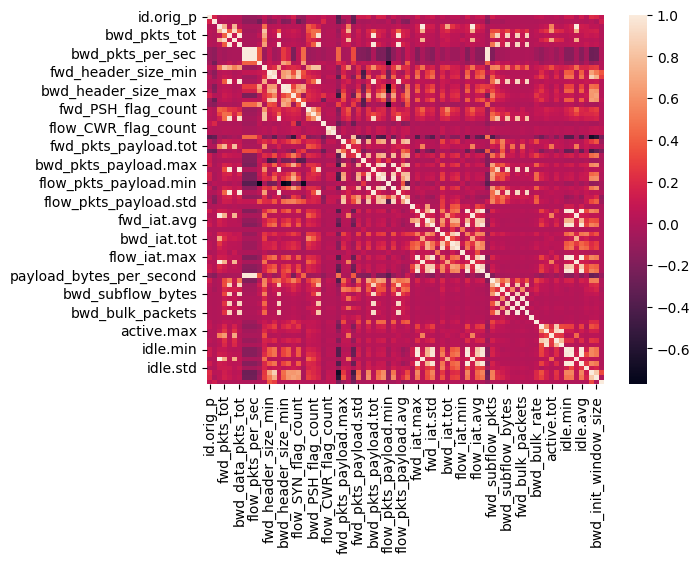

In [ ]:
sns.heatmap(data=corr)

In [ ]:
#reduction de dimension avec ANOVA avec la fonction de score (f_classif) pour effectuer le feature selection univariée sur l'ensemble de données
k_best_features = 70
selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_new = selector.fit_transform(selected_features, Y)
# Obtention des noms des colonnes sélectionnées
selected_column_indices = selector.get_support(indices=True)
selected_column_names_new = selected_column_names[selected_column_indices]

# Création d'un DataFrame avec les caractéristiques sélectionnées et les noms de colonnes correspondants
X_new_with_names = pd.DataFrame(X_new, columns=selected_column_names_new)

# Affichage du DataFrame avec les noms de colonnes
print("X_new_with_names :")
X_new_with_names.info()

X_new_with_names :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 70 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  float64
 1   id.resp_p                 123117 non-null  float64
 2   flow_duration             123117 non-null  float64
 3   fwd_pkts_tot              123117 non-null  float64
 4   bwd_pkts_tot              123117 non-null  float64
 5   fwd_data_pkts_tot         123117 non-null  float64
 6   fwd_pkts_per_sec          123117 non-null  float64
 7   bwd_pkts_per_sec          123117 non-null  float64
 8   flow_pkts_per_sec         123117 non-null  float64
 9   down_up_ratio             123117 non-null  float64
 10  fwd_header_size_tot       123117 non-null  float64
 11  fwd_header_size_min       123117 non-null  float64
 12  fwd_header_size_max       123117 non-null  float64
 13  bwd_header_size_tot      

<Axes: >

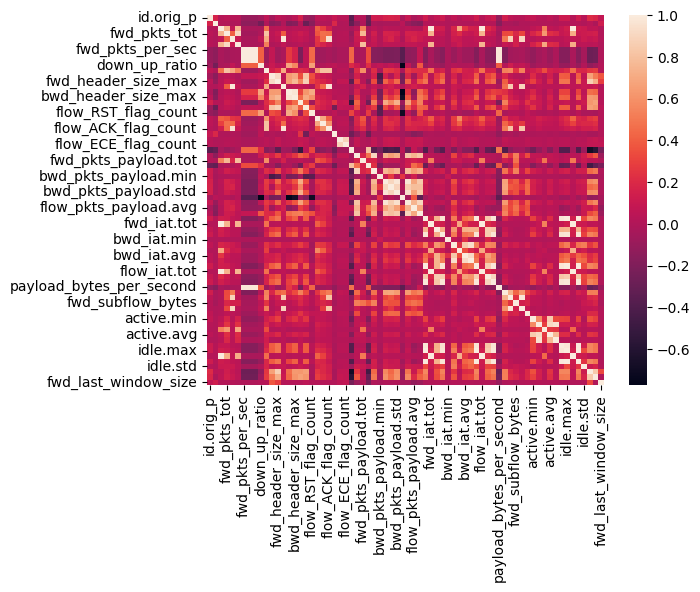

In [ ]:
corr= X_new_with_names.corr()
sns.heatmap(data=corr)

In [ ]:
n_comp = 54
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X_new_with_names)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
X_pca
print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

# Maintenant, vous pouvez accéder aux noms des caractéristiques observées lors de l'ajustement
feature_names = pca.feature_names_in_

# Afficher les noms des caractéristiques
print("Noms des caractéristiques : ", feature_names.shape)
X_pca

# Obtenez les noms des entités en sortie pour la transformation
feature_names_out = pca.get_feature_names_out()

# Afficher les noms des entités en sortie
print("Noms des entités en sortie : ", feature_names_out)

# Ajouter l'entête
data_pca= pd.DataFrame(X_pca,columns=feature_names_out)
data_pca


Running PCA ...
Explained variance: 0.9998
Individual variance contributions:
0.20728820423412203
0.11784426094468511
0.10176333557004262
0.08960350432653717
0.06570017750370107
0.05350085680841022
0.0433635795573184
0.033537649156177414
0.027645291602454013
0.026322726195345886
0.024531684272797002
0.02164152581837347
0.020150458789015172
0.016641502222317573
0.015484526485257201
0.01441753718846131
0.012712671402733178
0.012457101418710927
0.011427786091751636
0.011026079675902392
0.009959123492080767
0.00902467595192469
0.00747785325865744
0.006769834054499805
0.005910887481433262
0.004556552099433571
0.004181197520858905
0.003777480777047058
0.0031137829154751595
0.0024990340547285995
0.0022725085912708204
0.0017692318876226796
0.0016212306745142806
0.001523885763050485
0.0014593490968100684
0.0011525721244621096
0.0009952364602019612
0.0008058971847982926
0.0007014101409131577
0.0005535343572773964
0.000495846832521614
0.0004023405793864499
0.00032478543742343137
0.00029691636794

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53
0,8.960584,-6.590146,-0.949595,0.278459,1.352030,3.213427,-0.334552,-1.564957,0.671788,0.567918,...,0.061317,0.054022,-0.056511,0.047310,-0.053834,-0.109345,0.006640,0.088903,0.030483,0.025987
1,8.967031,-6.605731,-0.966464,0.233568,1.371050,3.120436,-0.543829,-1.458454,0.760364,0.683365,...,0.076337,0.067510,-0.057142,0.023865,-0.060013,-0.104063,0.009034,0.086097,0.033305,0.027989
2,8.985961,-6.620996,-0.946572,0.257885,1.362204,3.233794,-0.353119,-1.503495,0.714151,0.617166,...,0.061761,0.049836,-0.055599,0.048300,-0.048761,-0.107795,0.006097,0.089912,0.031993,0.025719
3,8.996339,-6.629996,-0.962943,0.197949,1.378734,3.161069,-0.562094,-1.348826,0.815390,0.748254,...,0.076600,0.062822,-0.056376,0.025272,-0.054818,-0.102865,0.008616,0.086755,0.034450,0.027526
4,8.977146,-6.604914,-0.962466,0.232979,1.364885,3.139013,-0.502275,-1.443072,0.747512,0.667520,...,0.074492,0.066139,-0.057353,0.023261,-0.060870,-0.104571,0.009483,0.084170,0.033031,0.027766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,-0.559668,-1.641523,0.920961,-2.984280,0.976691,3.341506,-3.510603,6.773076,0.821799,0.387773,...,-0.030495,0.017022,-0.066382,0.013676,-0.014121,0.036292,0.045819,-0.015267,0.038423,0.003485
123113,-0.547719,-1.655404,0.937225,-3.070794,0.978652,3.372780,-3.541921,6.798048,0.825211,0.383288,...,-0.030379,0.017643,-0.118294,0.015544,-0.013943,0.047689,0.045966,-0.015591,0.038784,0.004518
123114,-0.560843,-1.651588,0.931509,-3.012273,0.982738,3.357368,-3.529002,6.824341,0.826850,0.404274,...,-0.031313,0.017419,-0.067611,0.014027,-0.014524,0.037144,0.046956,-0.015642,0.039406,0.003567
123115,-0.561122,-1.653975,0.934011,-3.018914,0.984173,3.361131,-3.533366,6.836501,0.828049,0.408188,...,-0.031507,0.017513,-0.067903,0.014111,-0.014619,0.037346,0.047226,-0.015731,0.039639,0.003587


<Axes: >

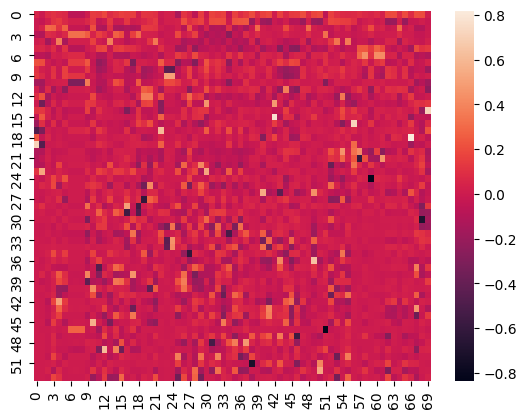

In [ ]:
# Visualiser les relations entre les features et les composantes principales
sns.heatmap(pca.components_)

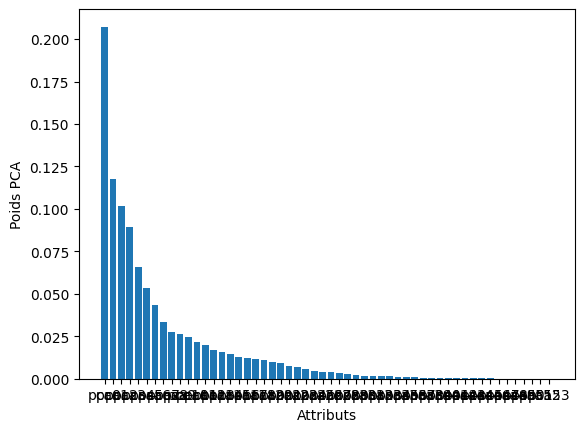

In [ ]:
# Visualisation de la distribution des poids
import matplotlib.pyplot as plt
plt.bar(feature_names_out, pca.explained_variance_ratio_)
plt.xlabel('Attributs')
plt.ylabel('Poids PCA')
plt.show()

In [ ]:
# Count the occurrences of each class
class_counts = Y.value_counts()
print(class_counts)

2     94659
10     8108
0      7750
3      4146
8      2590
9      2010
6      2000
7      1002
1       534
11      253
4        37
5        28
Name: Attack_type_encoder, dtype: int64


**Entraînement et utilisation des Algorithmes**

In [ ]:
# Importer les bibliothèques nécessaires
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(data_pca, Y, test_size=0.3, random_state=42)

# Initialiser l'objet RandomOverSampler avec la stratégie 'not minority'
ros = RandomOverSampler()

# Appliquer l'oversampling sur les données d'apprentissage
X_train_randomsampled, y_train_randomsampled = ros.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données oversampled
bankdata_oversampled = pd.concat([X_train_randomsampled, y_train_randomsampled], axis=1)

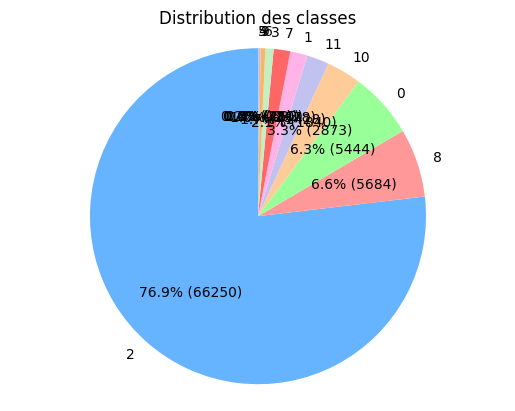

In [ ]:
#fonction de visualisation des données
def plot_pie_chart(y, title):
    labels = y.unique()
    sizes = y.value_counts().values
    colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2', '#ffb366', '#c2c2d6', '#ffb3b3']

    # Modifier le format des labels pour inclure les proportions et les nombres
    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100 * sum(all_values)))
        return f"{pct:.1f}% ({absolute})"

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), startangle=90)
    ax.axis('equal')  # Pour assurer que le diagramme est bien rond
    plt.title(title)
    plt.show()

# Utilisation de la fonction plot_pie_chart avec les classes allant de 1 à 11
plot_pie_chart(y_train, "Distribution des classes")


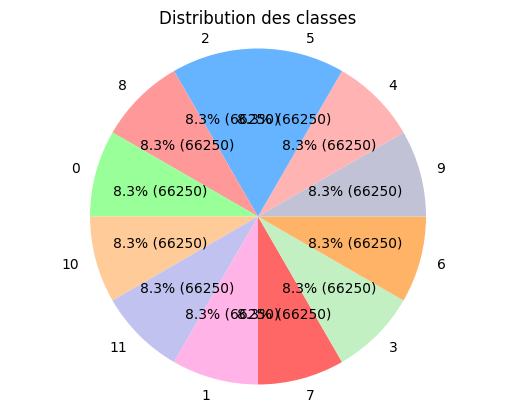

In [ ]:
#after RANDOM OVERSAMPLING
# Utilisation de la fonction plot_pie_chart avec les classes allant de 1 à 11
plot_pie_chart(y_train_randomsampled, "Distribution des classes")

In [ ]:
pd.Series(y_train).value_counts()

2     66250
10     5684
0      5444
3      2873
8      1840
9      1428
6      1378
7       683
1       380
11      174
4        26
5        21
Name: Attack_type_encoder, dtype: int64

In [ ]:
pd.Series(y_train_randomsampled.value_counts())

2     66250
8     66250
0     66250
10    66250
11    66250
1     66250
7     66250
3     66250
6     66250
9     66250
4     66250
5     66250
Name: Attack_type_encoder, dtype: int64

In [ ]:
# Define a dictionary to store the results
randomsampling_results = {}
smote_results = {}
undersampling_results = {}

In [ ]:
#Definition de la fonction d'entraînement et de Prédiction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def train_and_predict(model, X_train, y_train, methode):
    """
    Entraîne le modèle sur les données d'entraînement et retourne les prédictions sur les données de test.

    Args:
        model: Le modèle de classification à utiliser.
        X_train: Les données d'entraînement.
        y_train: Les étiquettes d'entraînement.
        X_test: Les données de test.
        methode: La méthode utilisée.

    Returns:
        Les prédictions du modèle sur les données de test.
    """
    # Mesurer le temps d'entraînement
    start_time = time.time()
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Faire des prédictions sur les données de test
    y_pred = model.predict(X_test)

    # Calculer et tracer la courbe ROC et l'AUC
    YtestDTProba = model.predict_proba(X_test)
    # Convertir y_test en un tableau NumPy à une seule dimension
    y_test_array = y_test.values.ravel()

    # Evaluation de performance (matrice de confusion)

    cm = confusion_matrix(y_test_array, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp = disp.plot()
    plt.show()

    # Calculer et tracer la courbe ROC et l'AUC
    YtestDTProba = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 12

    # Calculer la courbe ROC et l'AUC pour chaque classe
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_array == i, YtestDTProba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Tracer la courbe ROC pour chaque classe avec une couleur différente
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

    # Ligne en pointillés représentant la ligne de référence
    plt.plot([0, 1], [0, 1], 'k--')

    # Ajouter des légendes et des étiquettes d'axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for all Classes')
    plt.legend(loc="lower right")
    plt.show()

    # Calculer l'AUC moyen (généralisé) pour toutes les classes
    mean_auc = np.mean(list(roc_auc.values()))

    # Enregistrer les résultats dans le dictionnaire correspondant
    if methode == 'randomoversampling':
        results = randomsampling_results
    elif methode == 'smote':
        results = smote_results
    elif methode == 'undersampling':
        results = undersampling_results
    results[str(model).rstrip('() ')] = [
        accuracy_score(y_test_array, y_pred),
        precision_score(y_test_array, y_pred, average='weighted'),
        recall_score(y_test_array, y_pred, average='weighted'),
        f1_score(y_test_array, y_pred, average='weighted'),
        str(round(mean_auc, 3)),
        training_time
    ]

    df_randomsampling_results = pd.DataFrame.from_dict(randomsampling_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC','Training Time'])
    df_smote_results = pd.DataFrame.from_dict(smote_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC','Training Time'])
    df_undersampling_results = pd.DataFrame.from_dict(undersampling_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC','Training Time'])
    print(classification_report(y_test_array, y_pred))
    return None

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


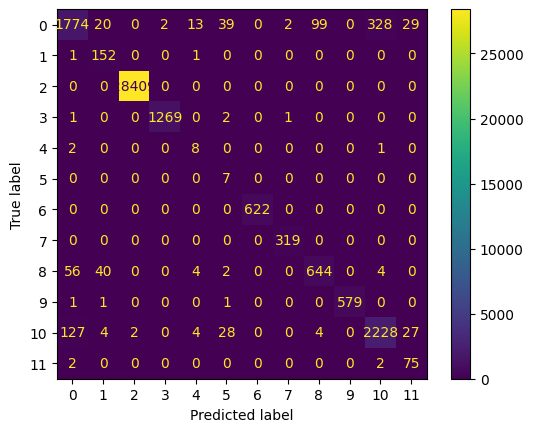

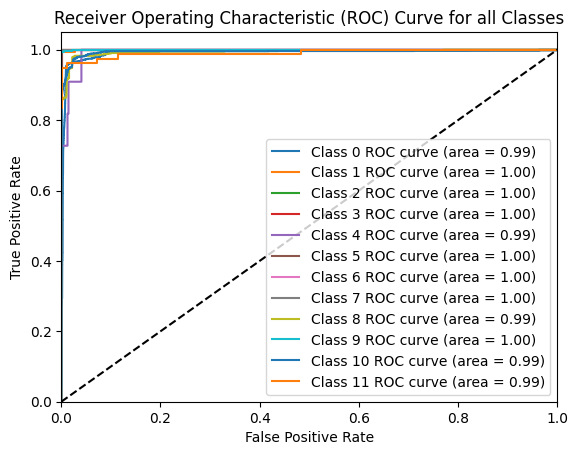

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2306
           1       0.70      0.99      0.82       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.27      0.73      0.39        11
           5       0.09      1.00      0.16         7
           6       1.00      1.00      1.00       622
           7       0.99      1.00      1.00       319
           8       0.86      0.86      0.86       750
           9       1.00      0.99      1.00       582
          10       0.87      0.92      0.89      2424
          11       0.57      0.95      0.71        79

    accuracy                           0.98     36936
   macro avg       0.77      0.93      0.81     36936
weighted avg       0.98      0.98      0.98     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'LogisticRegression'
train_and_predict(LogisticRegression(), X_train_randomsampled, y_train_randomsampled, 'randomoversampling')


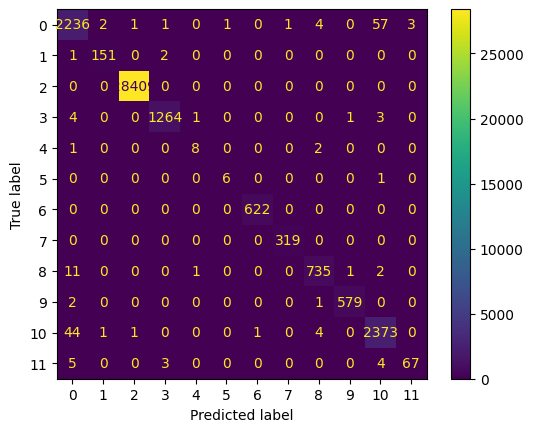

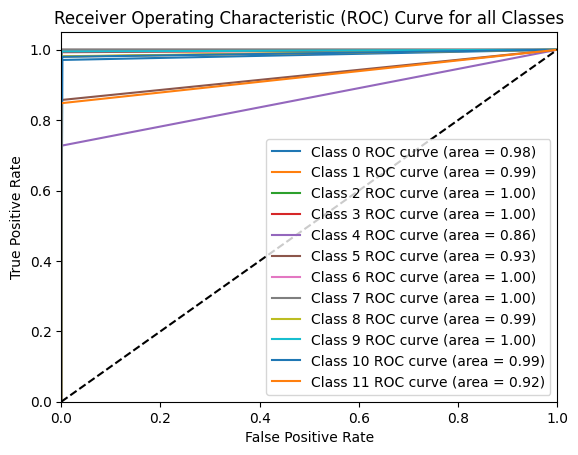

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2306
           1       0.98      0.98      0.98       154
           2       1.00      1.00      1.00     28409
           3       1.00      0.99      0.99      1273
           4       0.80      0.73      0.76        11
           5       0.86      0.86      0.86         7
           6       1.00      1.00      1.00       622
           7       1.00      1.00      1.00       319
           8       0.99      0.98      0.98       750
           9       1.00      0.99      1.00       582
          10       0.97      0.98      0.98      2424
          11       0.96      0.85      0.90        79

    accuracy                           1.00     36936
   macro avg       0.96      0.94      0.95     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'LogisticRegression'
train_and_predict(DecisionTreeClassifier(), X_train_randomsampled, y_train_randomsampled, 'randomoversampling')


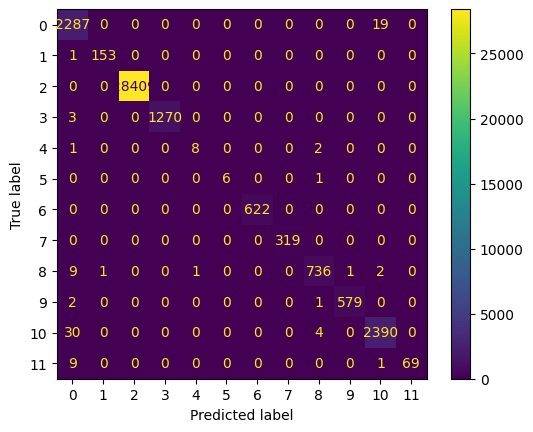

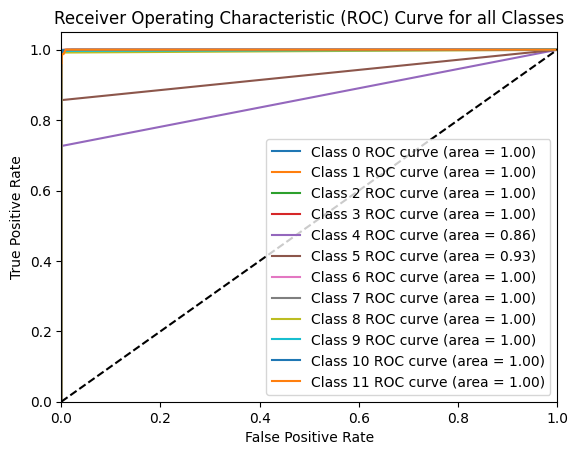

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2306
           1       0.99      0.99      0.99       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.89      0.73      0.80        11
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00       622
           7       1.00      1.00      1.00       319
           8       0.99      0.98      0.99       750
           9       1.00      0.99      1.00       582
          10       0.99      0.99      0.99      2424
          11       1.00      0.87      0.93        79

    accuracy                           1.00     36936
   macro avg       0.99      0.95      0.97     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'LogisticRegression'
train_and_predict(RandomForestClassifier(), X_train_randomsampled, y_train_randomsampled, 'randomoversampling')


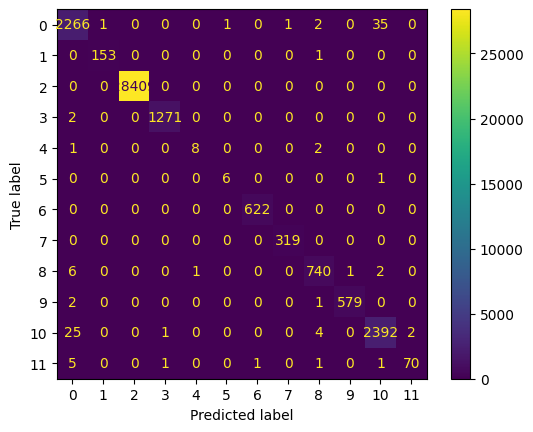

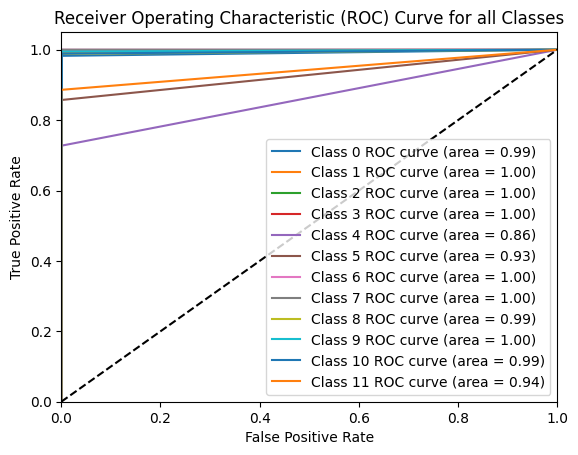

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2306
           1       0.99      0.99      0.99       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.89      0.73      0.80        11
           5       0.86      0.86      0.86         7
           6       1.00      1.00      1.00       622
           7       1.00      1.00      1.00       319
           8       0.99      0.99      0.99       750
           9       1.00      0.99      1.00       582
          10       0.98      0.99      0.99      2424
          11       0.97      0.89      0.93        79

    accuracy                           1.00     36936
   macro avg       0.97      0.95      0.96     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'KNeighborsClassifier'
train_and_predict(KNeighborsClassifier(), X_train_randomsampled, y_train_randomsampled, 'randomoversampling')

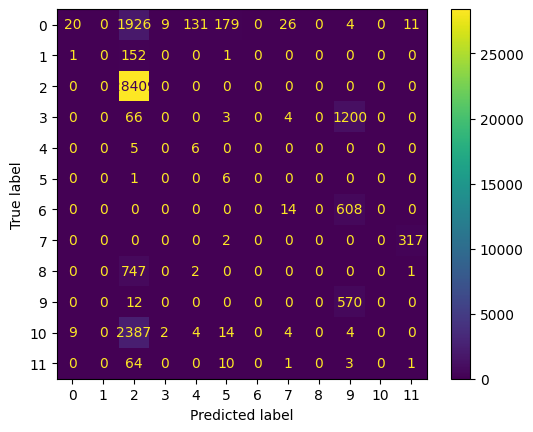

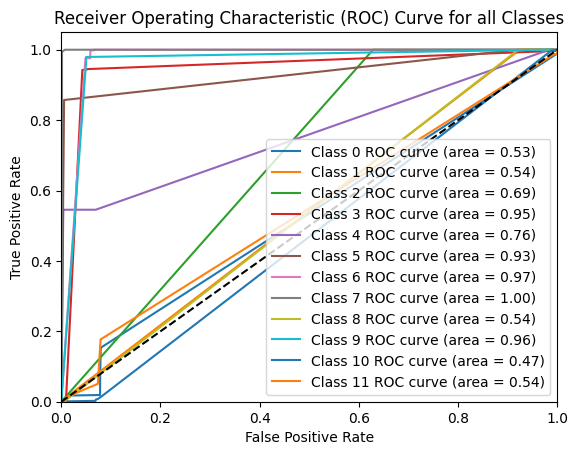

              precision    recall  f1-score   support

           0       0.67      0.01      0.02      2306
           1       0.00      0.00      0.00       154
           2       0.84      1.00      0.91     28409
           3       0.00      0.00      0.00      1273
           4       0.04      0.55      0.08        11
           5       0.03      0.86      0.05         7
           6       0.00      0.00      0.00       622
           7       0.00      0.00      0.00       319
           8       0.00      0.00      0.00       750
           9       0.24      0.98      0.38       582
          10       0.00      0.00      0.00      2424
          11       0.00      0.01      0.00        79

    accuracy                           0.79     36936
   macro avg       0.15      0.28      0.12     36936
weighted avg       0.69      0.79      0.71     36936



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
# Exemple d'utilisation avec la méthode 'AdaBoostClassifier'
train_and_predict(AdaBoostClassifier(), X_train_randomsampled, y_train_randomsampled, 'randomoversampling')

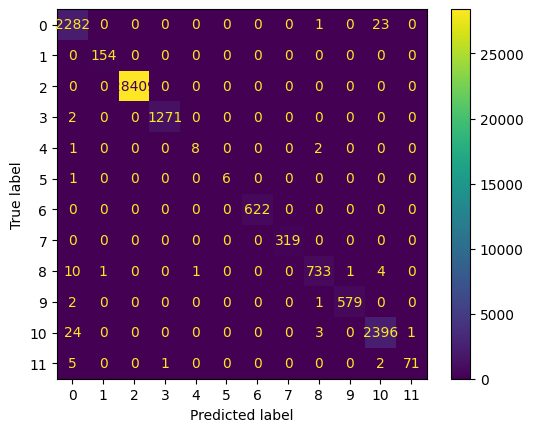

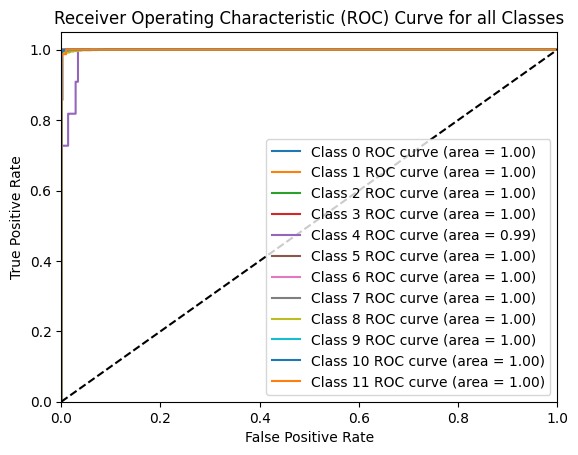

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2306
           1       0.99      1.00      1.00       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.89      0.73      0.80        11
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00       622
           7       1.00      1.00      1.00       319
           8       0.99      0.98      0.98       750
           9       1.00      0.99      1.00       582
          10       0.99      0.99      0.99      2424
          11       0.99      0.90      0.94        79

    accuracy                           1.00     36936
   macro avg       0.99      0.95      0.97     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
 # Exemple d'utilisation avec la méthode 'Support Vector Machines (SVM)'
train_and_predict(xgb.XGBClassifier(), X_train_randomsampled, y_train_randomsampled, 'randomoversampling')

In [ ]:
# Extraire la valeur de l'ancienne clé
ancienne_cle = list(randomsampling_results.keys())[4]  # 5 car l'index de Python commence à 0

# Créer une nouvelle clé et assigner la valeur
nouvelle_cle = 'XGBClassifier()'
randomsampling_results[nouvelle_cle] = randomsampling_results.pop(ancienne_cle)

In [ ]:
 df_randomsampling_results = pd.DataFrame.from_dict(randomsampling_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC','Training Time'])

In [ ]:
df_randomsampling_results


,Accuracy,Precision,Recall,F1-Score,AUC,Training Time
LogisticRegression,0.976987,0.979839,0.976987,0.977727,0.997,67.897746
DecisionTreeClassifier,0.995479,0.995471,0.995479,0.995466,0.972,24.541070
RandomForestClassifier,0.997618,0.997630,0.997618,0.997606,0.982,290.533119
KNeighborsClassifier,0.997266,0.997258,0.997266,0.997255,0.976,0.397195
XGBClassifier(),0.997672,0.997672,0.997672,0.997662,0.999,169.158644


In [ ]:
df_randomsampling_results.to_csv("randomsampling_results.csv", index=True)

In [ ]:
# Importer la classe SMOTE
from imblearn.over_sampling import SMOTE

# Initialiser l'objet SMOTE
smote = SMOTE()

# Appliquer l'oversampling SMOTE sur les données d'apprentissage
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données oversampled
bankdata_smote = pd.concat([X_train_smote, y_train_smote], axis=1)


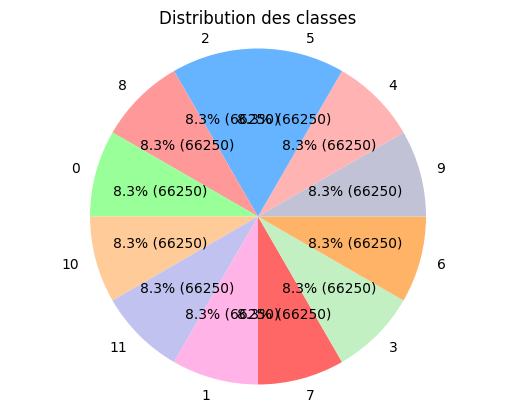

In [ ]:
# Utilisation de la fonction plot_pie_chart avec les classes allant de 1 à 11
plot_pie_chart(y_train_smote, "Distribution des classes")

In [ ]:
pd.Series(y_train).value_counts()

2     66250
10     5684
0      5444
3      2873
8      1840
9      1428
6      1378
7       683
1       380
11      174
4        26
5        21
Name: Attack_type_encoder, dtype: int64

In [ ]:
pd.Series(y_train_smote).value_counts()

2     66250
8     66250
0     66250
10    66250
11    66250
1     66250
7     66250
3     66250
6     66250
9     66250
4     66250
5     66250
Name: Attack_type_encoder, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


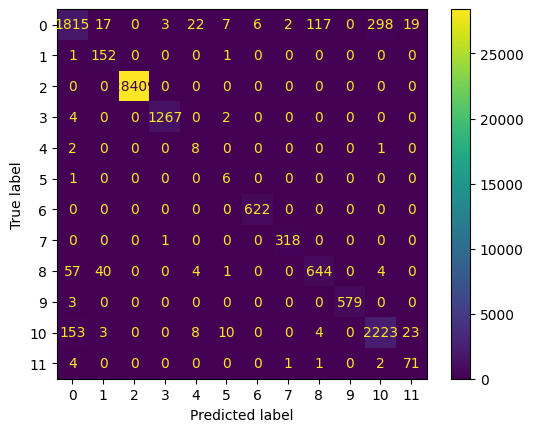

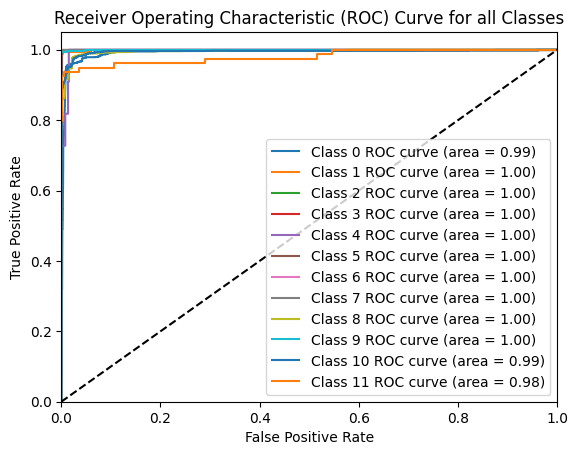

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      2306
           1       0.72      0.99      0.83       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.19      0.73      0.30        11
           5       0.22      0.86      0.35         7
           6       0.99      1.00      1.00       622
           7       0.99      1.00      0.99       319
           8       0.84      0.86      0.85       750
           9       1.00      0.99      1.00       582
          10       0.88      0.92      0.90      2424
          11       0.63      0.90      0.74        79

    accuracy                           0.98     36936
   macro avg       0.78      0.92      0.82     36936
weighted avg       0.98      0.98      0.98     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'LogisticRegression'
train_and_predict(LogisticRegression(), X_train_smote, y_train_smote, 'smote')

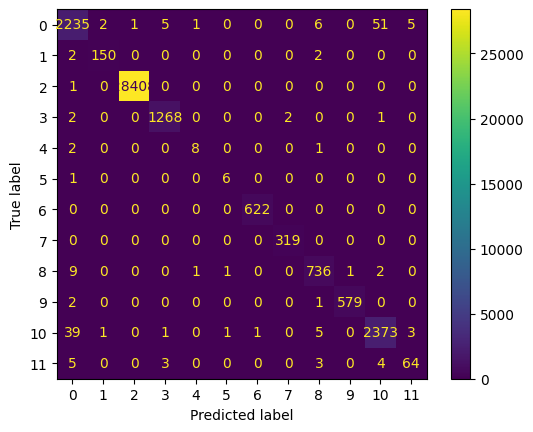

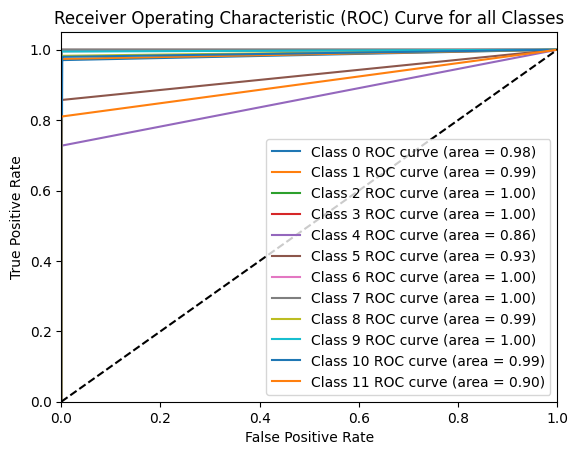

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2306
           1       0.98      0.97      0.98       154
           2       1.00      1.00      1.00     28409
           3       0.99      1.00      0.99      1273
           4       0.80      0.73      0.76        11
           5       0.75      0.86      0.80         7
           6       1.00      1.00      1.00       622
           7       0.99      1.00      1.00       319
           8       0.98      0.98      0.98       750
           9       1.00      0.99      1.00       582
          10       0.98      0.98      0.98      2424
          11       0.89      0.81      0.85        79

    accuracy                           1.00     36936
   macro avg       0.94      0.94      0.94     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'DecisionTreeClassifier'
train_and_predict(DecisionTreeClassifier(), X_train_smote, y_train_smote,'smote')

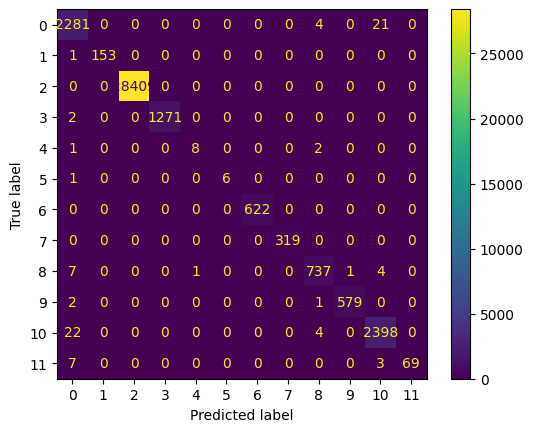

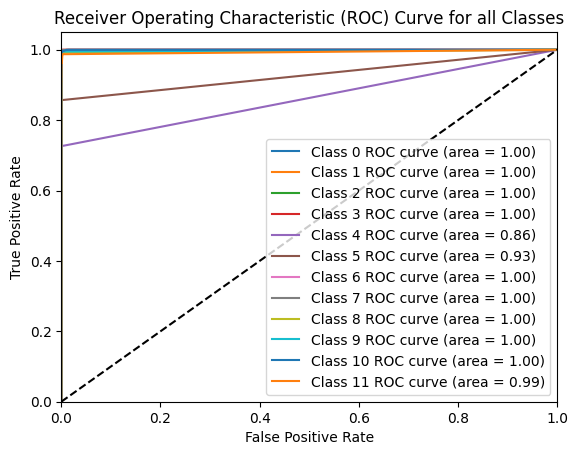

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2306
           1       1.00      0.99      1.00       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.89      0.73      0.80        11
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00       622
           7       1.00      1.00      1.00       319
           8       0.99      0.98      0.98       750
           9       1.00      0.99      1.00       582
          10       0.99      0.99      0.99      2424
          11       1.00      0.87      0.93        79

    accuracy                           1.00     36936
   macro avg       0.99      0.95      0.97     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'RandomForestClassifier'
train_and_predict(RandomForestClassifier(),X_train_smote, y_train_smote,'smote')

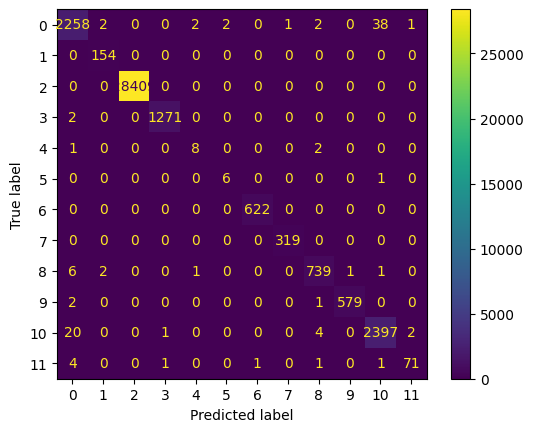

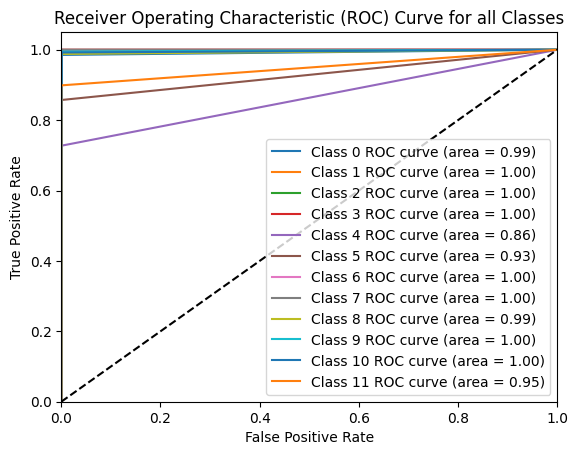

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2306
           1       0.97      1.00      0.99       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.73      0.73      0.73        11
           5       0.75      0.86      0.80         7
           6       1.00      1.00      1.00       622
           7       1.00      1.00      1.00       319
           8       0.99      0.99      0.99       750
           9       1.00      0.99      1.00       582
          10       0.98      0.99      0.99      2424
          11       0.96      0.90      0.93        79

    accuracy                           1.00     36936
   macro avg       0.95      0.95      0.95     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'KNeighborsClassifier'
train_and_predict(KNeighborsClassifier(), X_train_smote, y_train_smote,'smote')

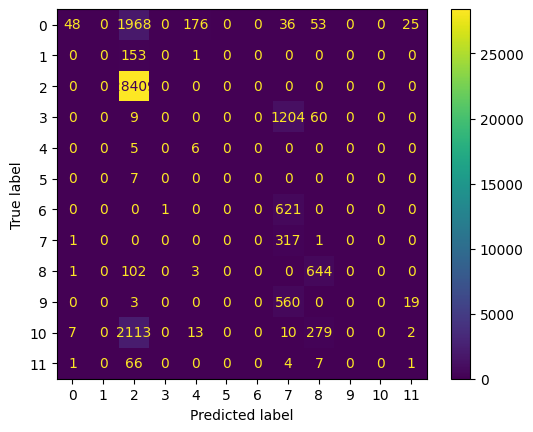

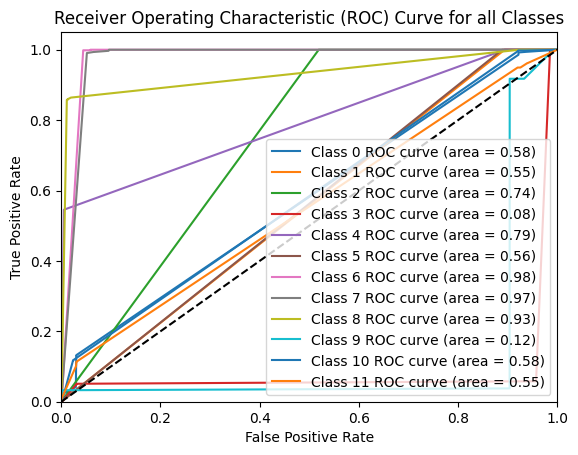

              precision    recall  f1-score   support

           0       0.83      0.02      0.04      2306
           1       0.00      0.00      0.00       154
           2       0.87      1.00      0.93     28409
           3       0.00      0.00      0.00      1273
           4       0.03      0.55      0.06        11
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00       622
           7       0.12      0.99      0.21       319
           8       0.62      0.86      0.72       750
           9       0.00      0.00      0.00       582
          10       0.00      0.00      0.00      2424
          11       0.02      0.01      0.02        79

    accuracy                           0.80     36936
   macro avg       0.21      0.29      0.16     36936
weighted avg       0.73      0.80      0.73     36936



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
# Exemple d'utilisation avec la méthode 'AdaBoostClassifier'
train_and_predict(AdaBoostClassifier(), X_train_smote, y_train_smote,'smote')

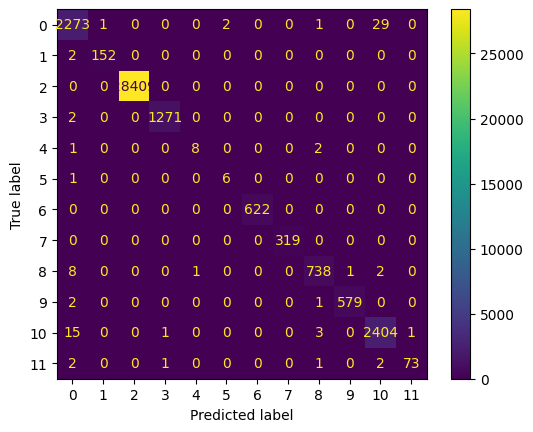

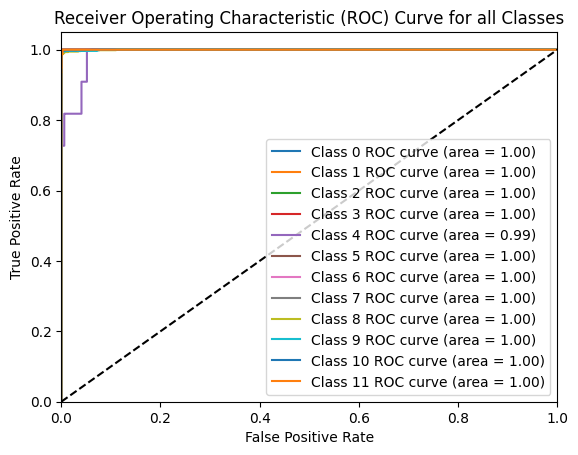

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2306
           1       0.99      0.99      0.99       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.89      0.73      0.80        11
           5       0.75      0.86      0.80         7
           6       1.00      1.00      1.00       622
           7       1.00      1.00      1.00       319
           8       0.99      0.98      0.99       750
           9       1.00      0.99      1.00       582
          10       0.99      0.99      0.99      2424
          11       0.99      0.92      0.95        79

    accuracy                           1.00     36936
   macro avg       0.96      0.95      0.96     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'Support Vector Machines (SVM)'
train_and_predict(xgb.XGBClassifier(), X_train_smote, y_train_smote,'smote')

In [ ]:
# Extraire la valeur de l'ancienne clé
ancienne_cle = list(smote_results.keys())[5]  # 5 car l'index de Python commence à 0

# Créer une nouvelle clé et assigner la valeur
nouvelle_cle = 'XGBClassifier()'
smote_results[nouvelle_cle] = smote_results.pop(ancienne_cle)

In [ ]:
 df_smote_results = pd.DataFrame.from_dict(smote_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC','Training Time'])

In [ ]:
df_smote_results


,Accuracy,Precision,Recall,F1-Score,AUC,Training Time
LogisticRegression,0.977745,0.979249,0.977745,0.978050,0.996,59.926387
DecisionTreeClassifier,0.995452,0.995434,0.995452,0.995437,0.97,90.086289
RandomForestClassifier,0.997726,0.997729,0.997726,0.997713,0.981,874.537011
KNeighborsClassifier,0.997211,0.997216,0.997211,0.997209,0.977,0.276616
AdaBoostClassifier,0.796648,0.730708,0.796648,0.732504,0.62,549.442025
XGBClassifier(),0.997780,0.997782,0.997780,0.997775,0.999,183.589078


In [ ]:
df_smote_results.to_csv("smote_results.csv", index=True)

In [ ]:
#
# Importer la classe undersampling
from imblearn.under_sampling import AllKNN

# Initialiser l'objet ALLkNN
allknn = AllKNN()

# Appliquer l'oversampling SMOTE sur les données d'apprentissage
X_undersampled, y_undersampled = allknn.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données oversampled
bankdata_undersampled = pd.concat([X_undersampled, y_undersampled], axis=1)


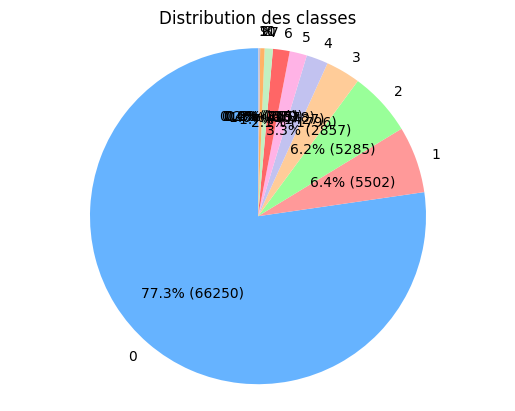

In [ ]:
# Utilisation de la fonction plot_pie_chart avec les classes allant de 1 à 11
plot_pie_chart(y_undersampled, "Distribution des classes")

In [ ]:
pd.Series(y_train).value_counts()

2     66250
10     5684
0      5444
3      2873
8      1840
9      1428
6      1378
7       683
1       380
11      174
4        26
5        21
Name: Attack_type_encoder, dtype: int64

In [ ]:
pd.Series(y_undersampled).value_counts()

2     66250
10     5502
0      5285
3      2857
8      1796
9      1427
6      1378
7       679
1       365
11      136
4        21
5        18
Name: Attack_type_encoder, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


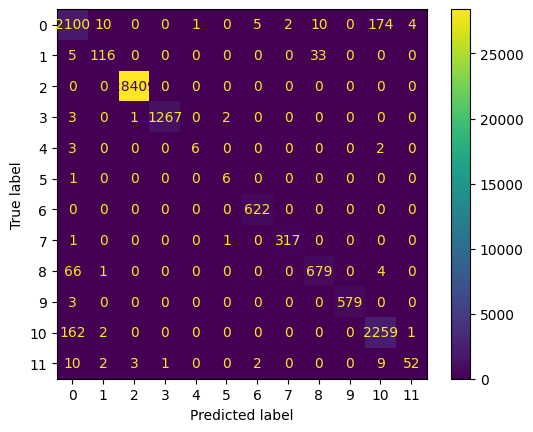

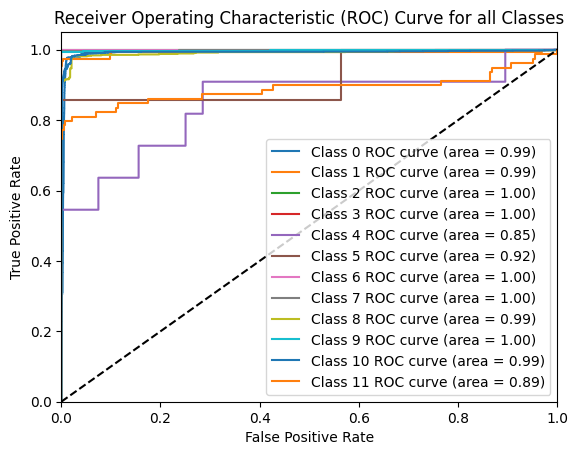

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2306
           1       0.89      0.75      0.81       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       0.86      0.55      0.67        11
           5       0.67      0.86      0.75         7
           6       0.99      1.00      0.99       622
           7       0.99      0.99      0.99       319
           8       0.94      0.91      0.92       750
           9       1.00      0.99      1.00       582
          10       0.92      0.93      0.93      2424
          11       0.91      0.66      0.76        79

    accuracy                           0.99     36936
   macro avg       0.92      0.88      0.89     36936
weighted avg       0.99      0.99      0.99     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'LogisticRegression'
train_and_predict(LogisticRegression(), X_undersampled, y_undersampled, 'undersampling')

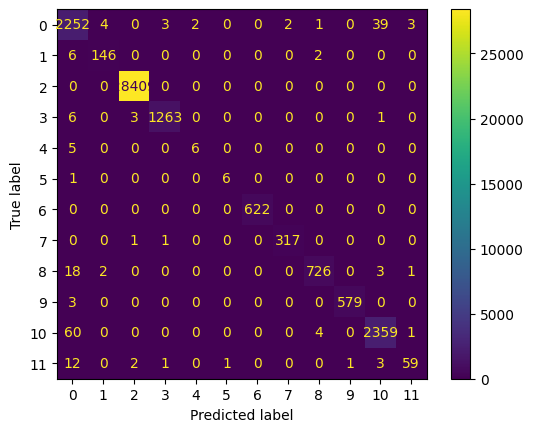

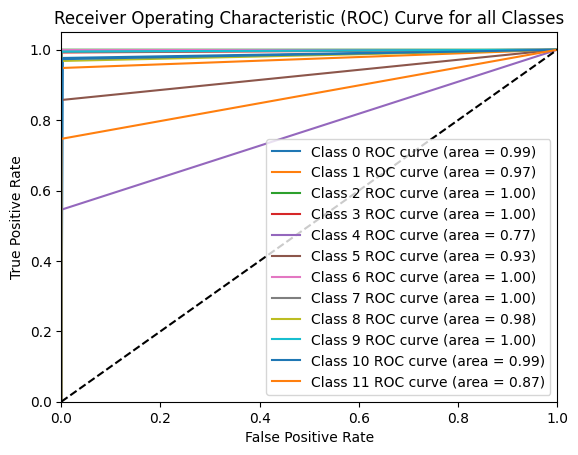

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2306
           1       0.96      0.95      0.95       154
           2       1.00      1.00      1.00     28409
           3       1.00      0.99      0.99      1273
           4       0.75      0.55      0.63        11
           5       0.86      0.86      0.86         7
           6       1.00      1.00      1.00       622
           7       0.99      0.99      0.99       319
           8       0.99      0.97      0.98       750
           9       1.00      0.99      1.00       582
          10       0.98      0.97      0.98      2424
          11       0.92      0.75      0.83        79

    accuracy                           0.99     36936
   macro avg       0.95      0.92      0.93     36936
weighted avg       0.99      0.99      0.99     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'DecisionTreeClassifier'
train_and_predict(DecisionTreeClassifier(), X_undersampled, y_undersampled, 'undersampling')

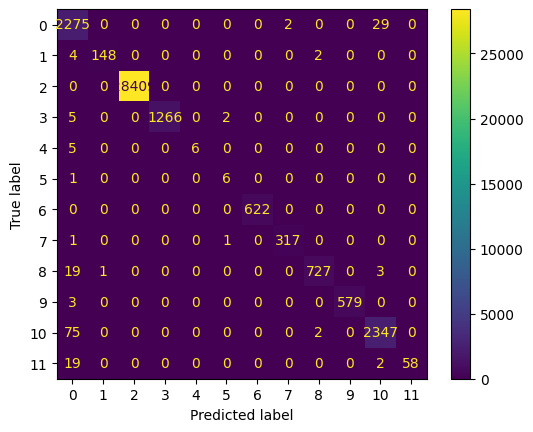

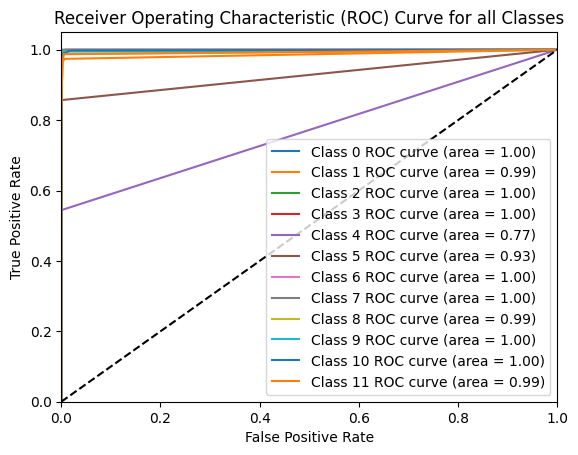

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2306
           1       0.99      0.96      0.98       154
           2       1.00      1.00      1.00     28409
           3       1.00      0.99      1.00      1273
           4       1.00      0.55      0.71        11
           5       0.67      0.86      0.75         7
           6       1.00      1.00      1.00       622
           7       0.99      0.99      0.99       319
           8       0.99      0.97      0.98       750
           9       1.00      0.99      1.00       582
          10       0.99      0.97      0.98      2424
          11       1.00      0.73      0.85        79

    accuracy                           1.00     36936
   macro avg       0.96      0.92      0.93     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'RandomForestClassifier'
train_and_predict(RandomForestClassifier(), X_undersampled, y_undersampled, 'undersampling')

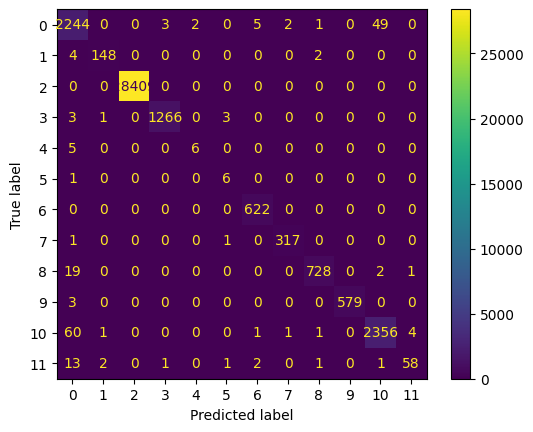

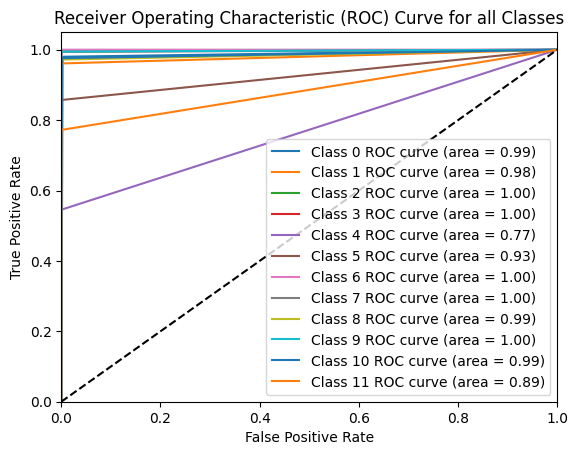

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2306
           1       0.97      0.96      0.97       154
           2       1.00      1.00      1.00     28409
           3       1.00      0.99      1.00      1273
           4       0.75      0.55      0.63        11
           5       0.55      0.86      0.67         7
           6       0.99      1.00      0.99       622
           7       0.99      0.99      0.99       319
           8       0.99      0.97      0.98       750
           9       1.00      0.99      1.00       582
          10       0.98      0.97      0.98      2424
          11       0.92      0.73      0.82        79

    accuracy                           0.99     36936
   macro avg       0.92      0.92      0.92     36936
weighted avg       0.99      0.99      0.99     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'KNeighborsClassifier'
train_and_predict(KNeighborsClassifier(), X_undersampled, y_undersampled, 'undersampling')

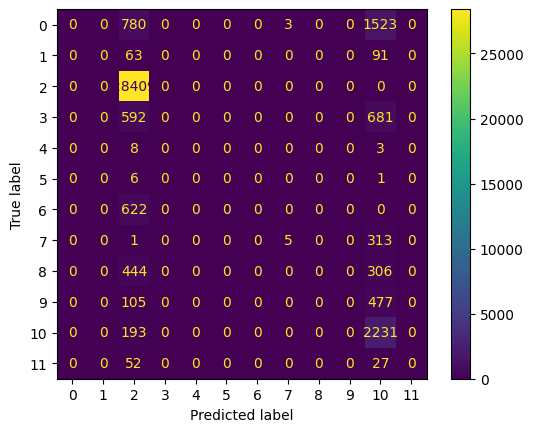

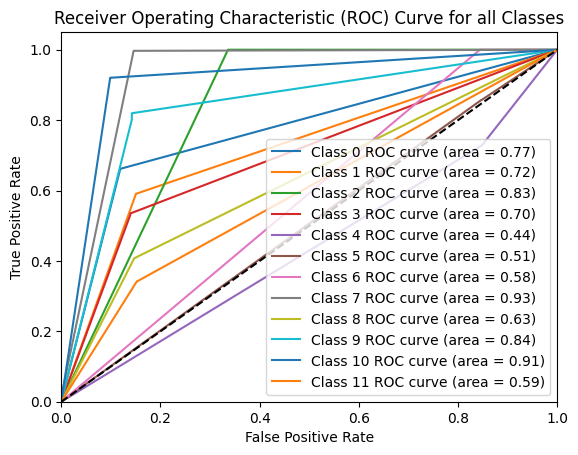

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2306
           1       0.00      0.00      0.00       154
           2       0.91      1.00      0.95     28409
           3       0.00      0.00      0.00      1273
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00       622
           7       0.62      0.02      0.03       319
           8       0.00      0.00      0.00       750
           9       0.00      0.00      0.00       582
          10       0.39      0.92      0.55      2424
          11       0.00      0.00      0.00        79

    accuracy                           0.83     36936
   macro avg       0.16      0.16      0.13     36936
weighted avg       0.73      0.83      0.77     36936



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
# Exemple d'utilisation avec la méthode 'AdaBoostClassifier'
train_and_predict(AdaBoostClassifier(), X_undersampled, y_undersampled, 'undersampling')

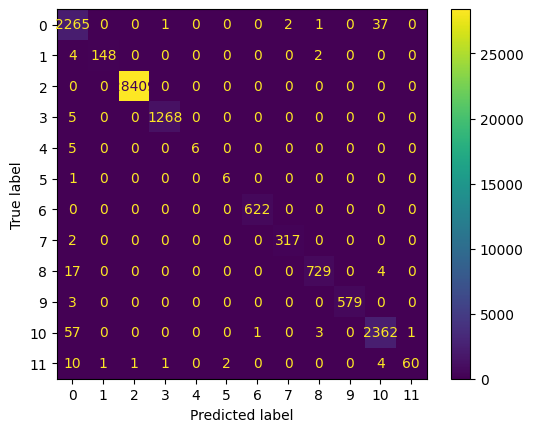

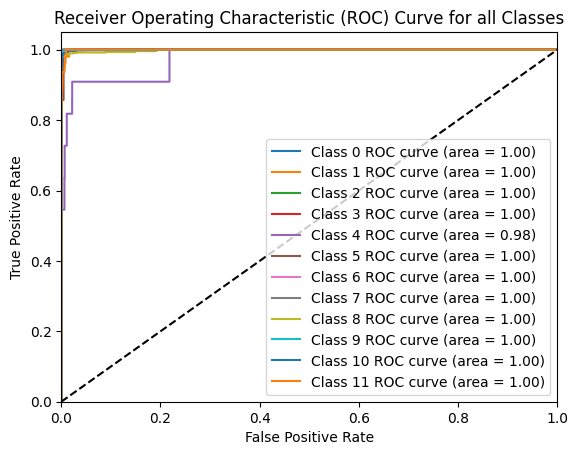

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2306
           1       0.99      0.96      0.98       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       1.00      0.55      0.71        11
           5       0.75      0.86      0.80         7
           6       1.00      1.00      1.00       622
           7       0.99      0.99      0.99       319
           8       0.99      0.97      0.98       750
           9       1.00      0.99      1.00       582
          10       0.98      0.97      0.98      2424
          11       0.98      0.76      0.86        79

    accuracy                           1.00     36936
   macro avg       0.97      0.92      0.94     36936
weighted avg       1.00      1.00      1.00     36936



In [ ]:
# Exemple d'utilisation avec la méthode 'Support Vector Machines (SVM)'
train_and_predict(xgb.XGBClassifier(), X_undersampled, y_undersampled, 'undersampling')

In [ ]:
# Extraire la valeur de l'ancienne clé
ancienne_cle = list(undersampling_results.keys())[5]  # 5 car l'index de Python commence à 0

# Créer une nouvelle clé et assigner la valeur
nouvelle_cle = 'XGBClassifier()'
undersampling_results[nouvelle_cle] = undersampling_results.pop(ancienne_cle)

In [ ]:
df_undersampling_results = pd.DataFrame.from_dict(undersampling_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC','Training Time'])

In [ ]:
df_undersampling_results

,Accuracy,Precision,Recall,F1-Score,AUC,Training Time
LogisticRegression,0.985813,0.985840,0.985813,0.985733,0.968,6.783506
DecisionTreeClassifier,0.994802,0.994805,0.994802,0.994766,0.958,3.885774
RandomForestClassifier,0.995235,0.995383,0.995235,0.995206,0.972,43.692653
KNeighborsClassifier,0.994666,0.994709,0.994666,0.994643,0.96,0.026325
AdaBoostClassifier,0.829678,0.729956,0.829678,0.768726,0.704,45.451466
XGBClassifier(),0.995533,0.995594,0.995533,0.995497,0.998,18.035619


In [ ]:
df_undersampling_results.to_csv("undersampling_results.csv", index=True)

In [ ]:
#Algorithmes de detection des meilleures Hyperparamètres


from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


params = {
    'n_estimators': [50, 100, 200],  # Nombre d'estimateurs à utiliser
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],  # Taux d'apprentissage
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithme utilisé
}


best_accuracy = 0
best_params = None


# Parcourir les différentes combinaisons d'hyperparamètres
for n_estimators in params['n_estimators']:
    for learning_rate in params['learning_rate']:
        for algorithm in params['algorithm']:
            # Créer et entraîner le modèle AdaBoost avec les hyperparamètres actuels
            ada = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm, random_state=42)
            ada.fit(X_train_smote, y_train_smote)

            # Faire des prédictions sur l'ensemble de test
            y_pred = ada.predict(X_test)

            # Calculer l'exactitude
            accuracy = accuracy_score(y_test, y_pred)

            # Mettre à jour les meilleurs hyperparamètres si l'exactitude est meilleure
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'algorithm': algorithm}


# Afficher les meilleurs hyperparamètres et leur exactitude correspondante
print("Meilleurs hyperparamètres:", best_params)
print("Exactitude correspondante:", best_accuracy)